In [32]:
#import dependen
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [33]:
global_temps = pd.read_csv("New Files/global_temps.csv")
global_temps.head()

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1,1,1930,2.401,0.226,7.670,0.216,-3.169,0.343,13.260,0.130
1,2,1,1930,3.152,0.236,8.900,0.252,-2.852,0.252,13.540,0.126
2,3,1,1930,5.483,0.191,11.539,0.273,-0.571,0.209,14.326,0.127
3,4,1,1930,8.182,0.242,14.017,0.254,2.072,0.271,15.081,0.124
4,5,1,1930,11.105,0.292,16.870,0.272,5.016,0.314,15.911,0.131


In [34]:
beef_prices = pd.read_csv("New Files/beef_prices.csv")
beef_prices.head()

,Month,day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
0,1,1,1970,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,2,1,1970,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,3,1,1970,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,4,1,1970,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,5,1,1970,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN


In [35]:
merged_beef_temps_df = pd.merge(global_temps, beef_prices, left_on=["Year", "Month"], right_on = ["Year", "Month"], how='inner')  # Specify the common column and type of merge
merged_beef_temps_df.head()

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,day,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
0,1,1,1970,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,...,1,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,2,1,1970,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,...,1,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,3,1,1970,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,...,1,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,4,1,1970,8.603,0.066,14.383,0.179,2.739,0.113,15.440,...,1,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,5,1,1970,11.206,0.099,17.165,0.121,5.402,0.107,16.104,...,1,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN


In [36]:
outliers_df = merged_beef_temps_df.loc[merged_beef_temps_df["Retail_value"]>400]
filtered_beef_temps_df =merged_beef_temps_df[merged_beef_temps_df["Retail_value"]<=400]
filtered_beef_temps_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,day,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
0,1,1,1970,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,...,1,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,2,1,1970,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,...,1,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,3,1,1970,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,...,1,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,4,1,1970,8.603,0.066,14.383,0.179,2.739,0.113,15.440,...,1,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,5,1,1970,11.206,0.099,17.165,0.121,5.402,0.107,16.104,...,1,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,8,1,2000,14.519,0.086,20.308,0.095,8.796,0.152,17.243,...,1,17.9,156.4,138.5,172.6,309.9,171.5,34.1,137.3,280.2
368,9,1,2000,12.547,0.058,18.373,0.115,6.822,0.142,16.613,...,1,19.3,155.8,136.6,168.6,313.0,176.5,32.0,144.4,280.9
369,10,1,2000,9.486,0.047,15.069,0.134,4.000,0.097,15.588,...,1,19.7,163.3,143.6,174.4,311.8,168.2,30.8,137.4,280.6
370,11,1,2000,6.312,0.084,11.670,0.092,0.996,0.064,14.632,...,1,19.9,172.3,152.4,182.8,310.3,157.8,30.3,127.5,279.6


In [37]:
average_beef_temps_df = filtered_beef_temps_df.groupby("Year")["Retail_value"].mean()

average_beef_temps_df = pd.DataFrame(average_beef_temps_df)

average_beef_temps_df.head()

,Retail_value
Year,
1970,99.941667
1971,106.241667
1972,116.641667
1973,139.666667
1974,143.816667


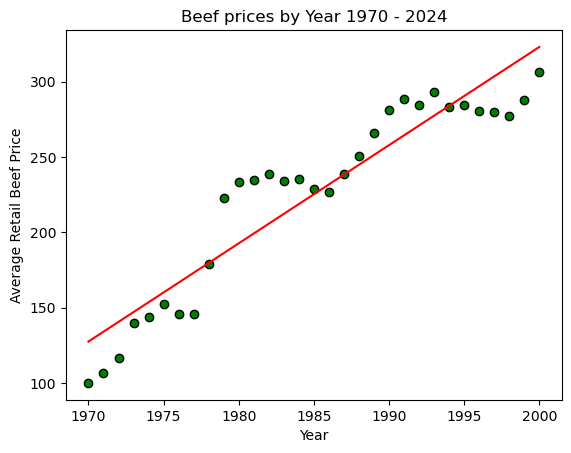

In [38]:
x = average_beef_temps_df.index
y = average_beef_temps_df["Retail_value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Average Retail Beef Price")
plt.title("Beef prices by Year 1970 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

In [40]:
pork_prices = pd.read_csv("New Files/pork_prices.csv")
pork_prices.head()

,Month,Day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
0,1,1,1970,4.3,52.3,48.0,71.2,81.4,33.4,23.2,10.2
1,2,1,1970,4.7,53.9,49.2,70.4,81.1,31.9,21.2,10.7
2,3,1,1970,4.8,49.6,44.8,68.0,80.7,35.9,23.2,12.7
3,4,1,1970,4.3,45.9,41.6,65.2,79.3,37.7,23.6,14.1
4,5,1,1970,3.7,44.9,41.2,65.2,79.4,38.2,24.0,14.2


In [41]:
merged_pork_temps_df = pd.merge(global_temps, pork_prices, left_on=["Year", "Month"], right_on = ["Year", "Month"], how='inner')  # Specify the common column and type of merge
merged_pork_temps_df.head()

,Month,Day_x,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Day_y,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
0,1,1,1970,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052,1,4.3,52.3,48.0,71.2,81.4,33.4,23.2,10.2
1,2,1,1970,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053,1,4.7,53.9,49.2,70.4,81.1,31.9,21.2,10.7
2,3,1,1970,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,0.058,1,4.8,49.6,44.8,68.0,80.7,35.9,23.2,12.7
3,4,1,1970,8.603,0.066,14.383,0.179,2.739,0.113,15.440,0.051,1,4.3,45.9,41.6,65.2,79.3,37.7,23.6,14.1
4,5,1,1970,11.206,0.099,17.165,0.121,5.402,0.107,16.104,0.055,1,3.7,44.9,41.2,65.2,79.4,38.2,24.0,14.2


In [42]:
outliers_df = merged_pork_temps_df.loc[merged_pork_temps_df["Retail_value"]>400]
filtered_pork_temps_df =merged_pork_temps_df[merged_pork_temps_df["Retail_value"]<=400]
filtered_pork_temps_df

,Month,Day_x,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Day_y,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
0,1,1,1970,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052,1,4.3,52.3,48.0,71.2,81.4,33.4,23.2,10.2
1,2,1,1970,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053,1,4.7,53.9,49.2,70.4,81.1,31.9,21.2,10.7
2,3,1,1970,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,0.058,1,4.8,49.6,44.8,68.0,80.7,35.9,23.2,12.7
3,4,1,1970,8.603,0.066,14.383,0.179,2.739,0.113,15.440,0.051,1,4.3,45.9,41.6,65.2,79.3,37.7,23.6,14.1
4,5,1,1970,11.206,0.099,17.165,0.121,5.402,0.107,16.104,0.055,1,3.7,44.9,41.2,65.2,79.4,38.2,24.0,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,8,1,2000,14.519,0.086,20.308,0.095,8.796,0.152,17.243,0.063,1,4.0,84.8,80.8,117.3,265.6,184.8,36.5,148.3
368,9,1,2000,12.547,0.058,18.373,0.115,6.822,0.142,16.613,0.061,1,4.1,81.3,77.2,111.9,265.0,187.8,34.6,153.1
369,10,1,2000,9.486,0.047,15.069,0.134,4.000,0.097,15.588,0.060,1,4.2,80.6,76.3,114.3,262.1,185.8,38.0,147.8
370,11,1,2000,6.312,0.084,11.670,0.092,0.996,0.064,14.632,0.062,1,3.7,70.8,67.0,108.1,259.3,192.3,41.1,151.2


In [43]:
average_pork_temps_df = filtered_pork_temps_df.groupby("Year")["Retail_value"].mean()

average_pork_temps_df = pd.DataFrame(average_pork_temps_df)

average_pork_temps_df.head()

,Retail_value
Year,
1970,77.383333
1971,69.816667
1972,82.666667
1973,109.208333
1974,107.816667


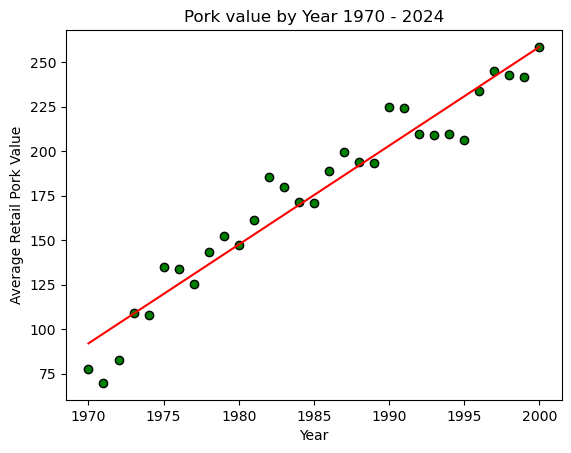

In [44]:
x = average_pork_temps_df.index
y = average_pork_temps_df["Retail_value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Average Retail Pork Value")
plt.title("Pork value by Year 1970 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

In [45]:
beef_prices.dtypes


Month                            int64
day                              int64
Year                             int64
Byproduct                      float64
Gross_farm_value               float64
Net_farm_value                 float64
Wholesale_value                float64
Retail_value                   float64
Total                          float64
Farm_wholesale                 float64
Wholesale_retail               float64
All_fresh_beef_retail_value    float64
dtype: object

In [46]:
pork_prices.dtypes

Month                 int64
Day                   int64
Year                  int64
Byproduct           float64
Gross_farm_value    float64
Net_farm_value      float64
Wholesale_value     float64
Retail_value        float64
Total               float64
Farm_wholesale      float64
Wholesale_retail    float64
dtype: object

In [48]:
#Find the retail value of beef 
beef_prices["All_fresh_beef_retail_value"] = beef_prices["All_fresh_beef_retail_value"]+beef_prices["Wholesale_value"]
beef_prices.head()

,Month,day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
0,1,1,1970,6.0,67.4,61.4,75.9,98.5,37.1,14.5,22.6,NaN
1,2,1,1970,6.4,69.8,63.4,75.6,98.3,34.9,12.2,22.7,NaN
2,3,1,1970,6.5,74.0,67.5,79.9,100.6,33.1,12.4,20.7,NaN
3,4,1,1970,6.5,73.4,66.9,79.2,101.1,34.2,12.3,21.9,NaN
4,5,1,1970,6.2,70.9,64.7,76.6,100.7,36.0,11.9,24.1,NaN


In [49]:
pork_prices["Wholesale_retail"] = beef_prices["All_fresh_beef_retail_value"]+beef_prices["Wholesale_value"]
pork_prices.head()

,Month,Day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
0,1,1,1970,4.3,52.3,48.0,71.2,81.4,33.4,23.2,NaN
1,2,1,1970,4.7,53.9,49.2,70.4,81.1,31.9,21.2,NaN
2,3,1,1970,4.8,49.6,44.8,68.0,80.7,35.9,23.2,NaN
3,4,1,1970,4.3,45.9,41.6,65.2,79.3,37.7,23.6,NaN
4,5,1,1970,3.7,44.9,41.2,65.2,79.4,38.2,24.0,NaN


In [50]:
beef_prices_1987_df = beef_prices.loc[beef_prices["Year"]>=1987]

#Drop null 
beef_prices_1987_df = beef_prices_1987_df.dropna()

beef_prices_1987_df

,Month,day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
210,7,1,1987,19.1,159.0,139.9,163.8,244.0,104.1,23.9,80.2,377.7
211,8,1,1987,19.4,156.5,137.1,157.0,241.2,104.1,19.9,84.2,370.1
212,9,1,1987,19.6,158.0,138.4,159.5,241.3,102.9,21.1,81.8,374.0
213,10,1,1987,20.0,157.9,137.9,159.2,241.5,103.6,21.3,82.3,376.9
214,11,1,1987,20.0,156.9,136.9,156.8,242.4,105.5,19.9,85.6,375.4
...,...,...,...,...,...,...,...,...,...,...,...,...
643,8,23,2024,36.2,430.8,394.6,467.5,822.5,428.0,72.9,355.1,1249.3
644,9,23,2024,36.9,436.7,399.8,462.6,818.1,418.3,62.8,355.5,1244.5
645,10,23,2024,35.6,439.1,403.4,458.7,816.6,413.1,55.3,357.9,1252.9
646,11,23,2024,33.2,427.7,394.5,453.4,803.9,409.4,58.9,350.5,1242.1


In [51]:
pork_prices_1987_df = pork_prices.loc[beef_prices["Year"]>=1987]

#Drop null 
pork_prices_1987_df = pork_prices_1987_df.dropna()

pork_prices_1987_df

,Month,Day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
210,7,1,1987,6.2,122.2,116.0,132.6,204.8,88.9,16.7,541.5
211,8,1,1987,6.1,119.7,113.6,133.5,207.6,94.0,19.9,527.1
212,9,1,1987,5.8,108.8,103.1,125.9,208.3,105.2,22.8,533.5
213,10,1,1987,5.1,96.4,91.4,118.4,205.7,114.3,27.1,536.1
214,11,1,1987,4.2,80.5,76.2,108.4,200.2,123.9,32.1,532.2
...,...,...,...,...,...,...,...,...,...,...,...
643,8,23,2024,10.3,133.7,123.4,209.6,483.4,360.0,86.2,1716.8
644,9,23,2024,9.7,116.7,107.0,185.2,497.6,390.7,78.2,1707.1
645,10,23,2024,9.9,108.6,98.7,168.1,504.3,405.6,69.4,1711.6
646,11,23,2024,10.0,100.8,90.8,154.9,488.0,397.2,64.1,1695.5


In [52]:
global_temps.dtypes

Month                                          int64
Day                                            int64
Year                                           int64
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [53]:

global_temps["LandAverageTemperature"] = global_temps["LandAverageTemperature"]+global_temps["LandAndOceanAverageTemperature"]
global_temps.head()

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1,1,1930,15.661,0.226,7.670,0.216,-3.169,0.343,13.260,0.130
1,2,1,1930,16.692,0.236,8.900,0.252,-2.852,0.252,13.540,0.126
2,3,1,1930,19.809,0.191,11.539,0.273,-0.571,0.209,14.326,0.127
3,4,1,1930,23.263,0.242,14.017,0.254,2.072,0.271,15.081,0.124
4,5,1,1930,27.016,0.292,16.870,0.272,5.016,0.314,15.911,0.131


In [54]:
global_temps_1987_df = global_temps.loc[global_temps["Year"]>=1987]

#Drop null 
global_temps_1987_df = global_temps_1987_df.dropna()

global_temps_1987_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
684,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,0.058
685,2,1,1987,18.295,0.091,9.792,0.105,-1.366,0.092,14.161,0.053
686,3,1,1987,19.783,0.076,11.203,0.074,-0.467,0.084,14.538,0.051
687,4,1,1987,24.042,0.078,14.690,0.083,2.835,0.220,15.447,0.052
688,5,1,1987,27.777,0.065,17.315,0.130,5.798,0.136,16.252,0.051
...,...,...,...,...,...,...,...,...,...,...,...
1027,8,1,2015,32.344,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1028,9,1,2015,30.048,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1029,10,1,2015,27.091,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1030,11,1,2015,22.685,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [55]:
#cleaned dataFrame
cleaned_pork_df = pd.merge(global_temps_1987_df, pork_prices_1987_df, on='Year', how='inner')

cleaned_pork_df.head()

,Month_x,Day_x,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,Month_y,Day_y,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
0,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,7,1,6.2,122.2,116.0,132.6,204.8,88.9,16.7,541.5
1,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,8,1,6.1,119.7,113.6,133.5,207.6,94.0,19.9,527.1
2,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,9,1,5.8,108.8,103.1,125.9,208.3,105.2,22.8,533.5
3,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,10,1,5.1,96.4,91.4,118.4,205.7,114.3,27.1,536.1
4,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,11,1,4.2,80.5,76.2,108.4,200.2,123.9,32.1,532.2


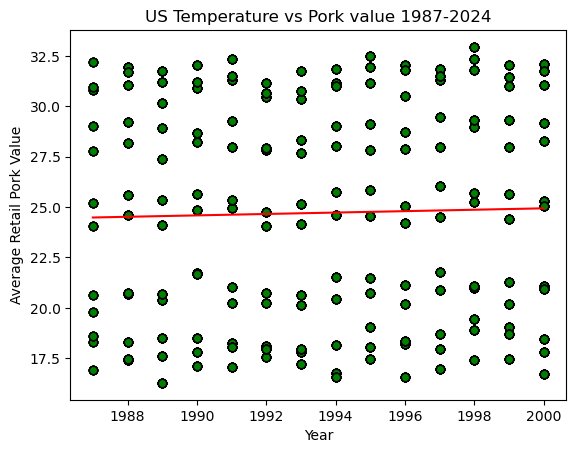

In [56]:
x = cleaned_pork_df["Year"]
y = cleaned_pork_df["LandAverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Average Retail Pork Value")
plt.title("US Temperature vs Pork value 1987-2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

In [57]:
cleaned_beef_df = pd.merge(global_temps_1987_df, beef_prices_1987_df, on='Year', how='inner')

cleaned_beef_df.head()

,Month_x,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,...,day,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
0,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,1,19.1,159.0,139.9,163.8,244.0,104.1,23.9,80.2,377.7
1,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,1,19.4,156.5,137.1,157.0,241.2,104.1,19.9,84.2,370.1
2,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,1,19.6,158.0,138.4,159.5,241.3,102.9,21.1,81.8,374.0
3,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,1,20.0,157.9,137.9,159.2,241.5,103.6,21.3,82.3,376.9
4,1,1,1987,16.897,0.115,8.701,0.082,-2.344,0.109,13.758,...,1,20.0,156.9,136.9,156.8,242.4,105.5,19.9,85.6,375.4


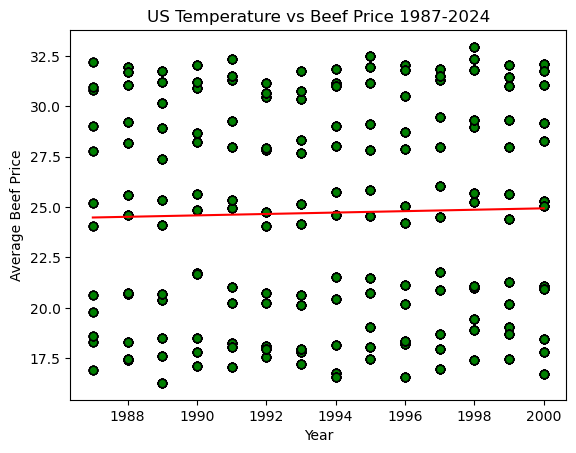

In [58]:
x = cleaned_beef_df["Year"]
y = cleaned_beef_df["LandAverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Average Beef Price")
plt.title("US Temperature vs Beef Price 1987-2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

In [59]:
beef_july_df = beef_prices_1987_df.loc[beef_prices_1987_df["Month"]==7]
beef_july_df

,Month,day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
210,7,1,1987,19.1,159.0,139.9,163.8,244.0,104.1,23.9,80.2,377.7
222,7,1,1988,21.1,159.9,138.8,159.2,254.9,116.1,20.4,95.7,388.2
234,7,1,1989,19.9,171.1,151.2,174.2,269.7,118.5,23.0,95.5,423.7
246,7,1,1990,20.1,180.6,160.5,182.4,279.9,119.4,21.9,97.5,445.9
258,7,1,1991,17.2,173.4,156.2,178.8,288.4,132.2,22.6,109.6,450.4
270,7,1,1992,18.7,175.6,156.9,173.6,283.8,126.9,16.7,110.2,437.3
282,7,1,1993,19.3,176.9,157.6,175.9,296.7,139.1,18.3,120.8,449.9
294,7,1,1994,19.5,156.7,137.2,160.4,280.1,142.9,23.2,119.7,422.6
306,7,1,1995,19.9,149.0,129.1,158.5,287.4,158.3,29.4,128.9,416.6
318,7,1,1996,22.0,153.6,131.6,155.6,277.6,146.0,24.0,122.0,403.1


In [60]:
pork_july_df = pork_prices_1987_df.loc[pork_prices_1987_df["Month"]==7]
pork_july_df

,Month,Day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail
210,7,1,1987,6.2,122.2,116.0,132.6,204.8,88.9,16.7,541.5
222,7,1,1988,4.9,90.3,85.3,105.1,198.3,113.0,19.8,547.4
234,7,1,1989,5.1,93.3,88.3,105.7,193.4,105.1,17.5,597.9
246,7,1,1990,6.4,122.8,116.4,133.8,235.1,118.7,17.4,628.3
258,7,1,1991,5.2,109.5,104.3,121.6,230.3,126.0,17.3,629.2
270,7,1,1992,4.6,89.4,84.7,107.0,212.2,127.5,22.3,610.9
282,7,1,1993,4.8,91.2,86.4,108.0,211.8,125.4,21.7,625.8
294,7,1,1994,4.7,84.0,79.2,105.0,212.1,132.9,25.8,583.0
306,7,1,1995,5.5,93.2,87.7,106.8,202.5,114.8,19.1,575.1
318,7,1,1996,7.1,117.5,110.4,129.1,238.8,128.4,18.7,558.7


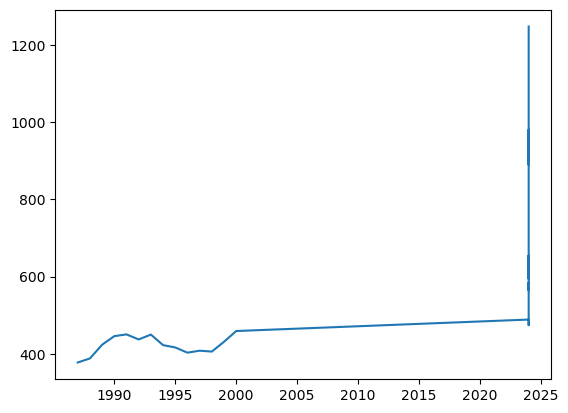

In [61]:
#Line graph for beef retail prices
x = beef_july_df["Year"]
y = beef_july_df["All_fresh_beef_retail_value"]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()

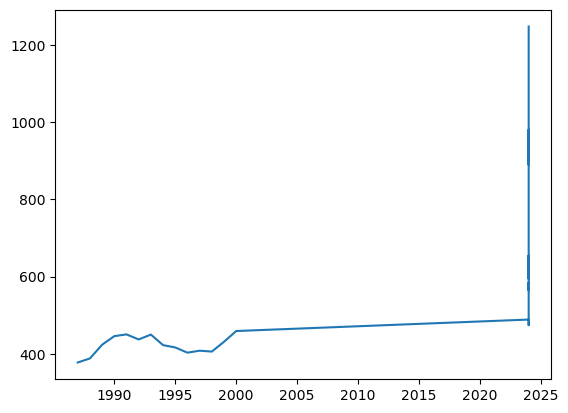

In [62]:
#Line graph for pork retail prices
x = beef_july_df["Year"]
y = beef_july_df["All_fresh_beef_retail_value"]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()

In [63]:
global_temps_1987_df = global_temps.loc[global_temps["Month"]==7]
global_temps_1987_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
6,7,1,1930,31.319,0.301,20.252,0.267,8.415,0.287,16.854,0.137
18,7,1,1931,31.543,0.302,20.399,0.275,8.665,0.328,16.967,0.138
30,7,1,1932,31.218,0.306,20.093,0.286,8.416,0.339,16.846,0.138
42,7,1,1933,30.940,0.300,20.037,0.282,8.295,0.291,16.704,0.136
54,7,1,1934,31.194,0.296,20.140,0.288,8.472,0.317,16.851,0.134
...,...,...,...,...,...,...,...,...,...,...,...
978,7,1,2011,33.050,0.113,21.320,0.131,9.684,0.110,17.568,0.062
990,7,1,2012,32.526,0.076,21.006,0.079,9.229,0.113,17.450,0.060
1002,7,1,2013,32.506,0.126,20.737,0.100,9.330,0.153,17.503,0.068
1014,7,1,2014,32.381,0.078,20.711,0.091,9.112,0.135,17.508,0.061


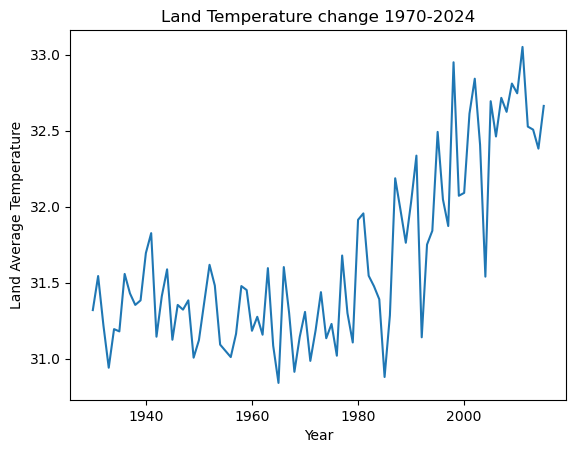

In [70]:
#Line graph for global temperature 
x = global_temps_1987_df['Year']
y = global_temps_1987_df["LandAverageTemperature"]
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.title("Land Temperature change 1970-2024")
#fig, ax = plt.subplots()
plt.plot(x,y)
#ax.plot(x, y)

plt.show()


In [65]:
filtered_beef = beef_prices_1987_df[beef_prices_1987_df["All_fresh_beef_retail_value"]<=400]
filtered_beef

,Month,day,Year,Byproduct,Gross_farm_value,Net_farm_value,Wholesale_value,Retail_value,Total,Farm_wholesale,Wholesale_retail,All_fresh_beef_retail_value
210,7,1,1987,19.1,159.0,139.9,163.8,244.0,104.1,23.9,80.2,377.7
211,8,1,1987,19.4,156.5,137.1,157.0,241.2,104.1,19.9,84.2,370.1
212,9,1,1987,19.6,158.0,138.4,159.5,241.3,102.9,21.1,81.8,374.0
213,10,1,1987,20.0,157.9,137.9,159.2,241.5,103.6,21.3,82.3,376.9
214,11,1,1987,20.0,156.9,136.9,156.8,242.4,105.5,19.9,85.6,375.4
215,12,1,1987,20.5,156.0,135.5,155.4,241.1,105.6,19.9,85.7,373.9
216,1,1,1988,21.3,158.8,137.5,159.3,238.8,101.3,21.8,79.5,371.8
217,2,1,1988,21.9,166.0,144.1,163.3,242.1,98.0,19.2,78.8,379.1
218,3,1,1988,23.5,173.1,149.6,169.6,244.3,94.7,20.0,74.7,387.9
219,4,1,1988,23.3,176.7,153.4,172.6,245.9,92.5,19.2,73.3,393.8


In [66]:
#Find Averages of beef retail value
average_df = filtered_beef.groupby("Year")["All_fresh_beef_retail_value"].sum()

average_df = pd.DataFrame(average_df)

average_df.head()

,All_fresh_beef_retail_value
Year,
1987,2248.0
1988,2710.7
1996,398.2
